# Data Wrangling



-----------------------

# The idea behind Data Wrangling

Data wrangling, also known as data munging, is a crucial step in the data analysis process that involves cleaning, structuring, and enriching raw data into a desired format for better decision making in less time. It is essentially the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics and reporting. Let's delve into the idea behind data wrangling and why it's so important.

## Why is Data Wrangling Important?

Data wrangling is essential for several reasons:

1. **Facilitates Easier Analysis:** Data in its raw form is often complex and unwieldy. Wrangling simplifies this data, making it easier to work with in analysis tools.

2. **Improves Data Quality:** The process helps identify and correct errors or inconsistencies in data, leading to more accurate analysis results.

3. **Saves Time:** Although data wrangling can be time-consuming, it ultimately saves time during the analysis phase by ensuring that data is in a consistent format that can be easily manipulated and explored.


### Concept of Tidy Data (Long Format)





Tidy datasets are easy to manipulate, model and visualize, and have a specific structure:
- each variable is a column
- each observation is a row
- and each type of observational unit is a table
Tidy data makes it easy for an analyst or a computer to extract needed variables because it provides a standard way of structuring a dataset. It is also very pleasant to work with in the data exploration and plotting phases of a data project.

![Tidy data](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

In [36]:
# example of a tidy dataset --> Pinguins dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
penguins = sns.load_dataset("penguins")

In [38]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Penguins is a tidy dataset. Why is this data tidy ?

Characteristics of tidy datasets:
- observational unit ==: one penguin
- each variable is a column
- the table is all about penguins


#### Untidy datasets can violate the Tidy data structure rules above in different ways. For example:
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.

In [39]:
penguins.describe().round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.00,342.00,342.00,342.00
mean,43.92,17.15,200.92,4201.75
std,5.46,1.97,14.06,801.95
min,32.10,13.10,172.00,2700.00
25%,39.22,15.60,190.00,3550.00
50%,44.45,17.30,197.00,4050.00
75%,48.50,18.70,213.00,4750.00
max,59.60,21.50,231.00,6300.00


In [40]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [41]:
penguins.shape

(344, 7)

#### Let's visualize how many penguins are living on different islands, including the information about gender.

<Axes: xlabel='island', ylabel='count'>

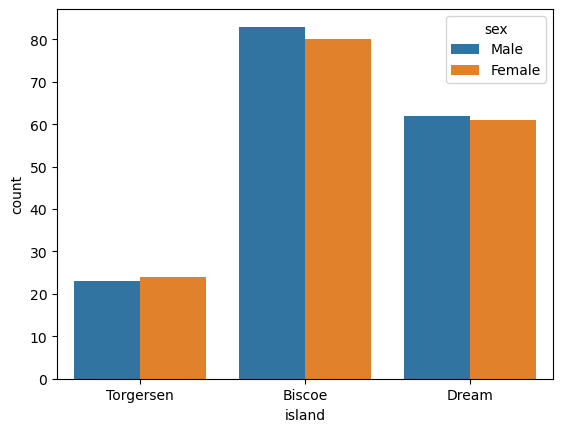

In [42]:
sns.countplot(data=penguins, hue='sex', x='island')

#### Let's imagine we want now to compare penguins from different islands, but now we want to use the type of the bill measurement as the hue.

<Axes: xlabel='island', ylabel='bill_length_mm'>

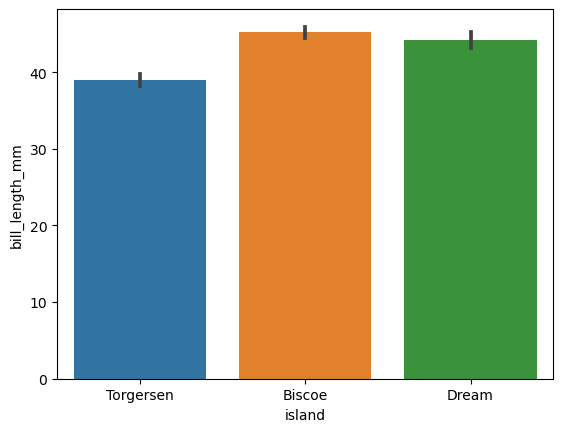

In [43]:
# let's experiment with the possible options: barplot instead of countplot

sns.barplot(data=penguins, x='island', y='bill_length_mm')

<Axes: xlabel='bill_length_mm', ylabel='island'>

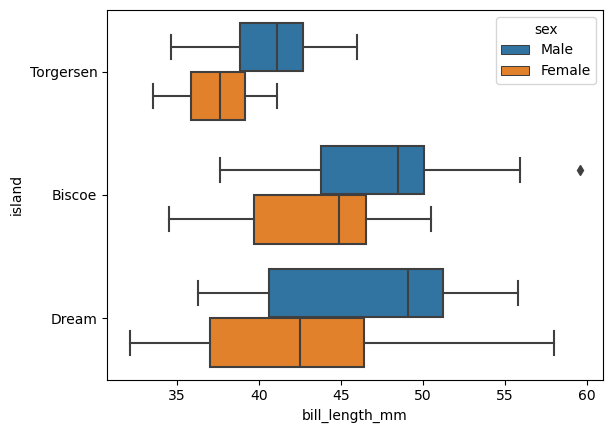

In [44]:
# let's experiment with the possible options: boxplot instead of barplot

sns.boxplot(hue='sex', y='island', x='bill_length_mm', data=penguins)

There is no easy option to bring both of the bill measurements to a single visual besides changing the format of the data. To bring both of the bill measurements it would be helpful to have the distinction between the measurements in a column (the same way as we have it for e.g. island)

### Wide versus Long Data Format
Data in pandas and tabular data in general can exist in two forms: long and wide format.

- In the long format, for each type of variable, there is a single value column and another column that contains the variable name for each of the values. This format is great for plotting with seaborn.

- In the wide format, each variable has its own column. This format is great for calculating descriptive statistics or for applying machine learning with sklearn.

The conversion between long and wide format helps you to bring data into the right format for merging, concatenation or plotting.

Before applying the transformations, make sure that your data is Tidy Data. Once your data is tidy, transformations from one format to the other will become simple.


We can melt bill measurements and have a single bill column, this will give us a long format dataframe

In [45]:
# before we do that, it would be helpful to have an additional penguin id column
penguins['id'] = penguins.index

In [46]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,4


Melt is used to transform the data from wide to long format.

- id_vars:                 <=== Column(s) to use as identifier variables
- value_vars:              <=== Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
- var_name:                <=== Name to use for the ‘variable’ column.
- value_name:              <=== Name to use for the ‘value’ column.

In [49]:
penguins_long = pd.melt(penguins,                                        # dataset
                        id_vars=['id', 'sex', 'species', 'island'],      # Column(s) to use as identifier variables
                        value_vars=['bill_length_mm', 'bill_depth_mm'],  # Column(s) to unpivot
                        var_name='bill_measurement',                     # Name to use for the ‘variable’ column
                        value_name='value')                              # Name to use for the ‘value’ column

In [50]:
penguins_long.head()

,id,sex,species,island,bill_measurement,value
0,0,Male,Adelie,Torgersen,bill_length_mm,39.1
1,1,Female,Adelie,Torgersen,bill_length_mm,39.5
2,2,Female,Adelie,Torgersen,bill_length_mm,40.3
3,3,NaN,Adelie,Torgersen,bill_length_mm,NaN
4,4,Female,Adelie,Torgersen,bill_length_mm,36.7


How are the dimensions different from the original dataframe? How to interpret it?

In [27]:
penguins_long.shape

(688, 6)

A: For every penguin we have 2 rows right now (double number of rows). Numerical columns were reduced to only one.

In [28]:
penguins_long.sort_values(by='id')

,id,sex,species,island,bill_measurement,value
0,0,Male,Adelie,Torgersen,bill_length_mm,39.1
344,0,Male,Adelie,Torgersen,bill_depth_mm,18.7
345,1,Female,Adelie,Torgersen,bill_depth_mm,17.4
1,1,Female,Adelie,Torgersen,bill_length_mm,39.5
2,2,Female,Adelie,Torgersen,bill_length_mm,40.3
...,...,...,...,...,...,...
341,341,Male,Gentoo,Biscoe,bill_length_mm,50.4
686,342,Female,Gentoo,Biscoe,bill_depth_mm,14.8
342,342,Female,Gentoo,Biscoe,bill_length_mm,45.2
343,343,Male,Gentoo,Biscoe,bill_length_mm,49.9


<Axes: xlabel='island', ylabel='value'>

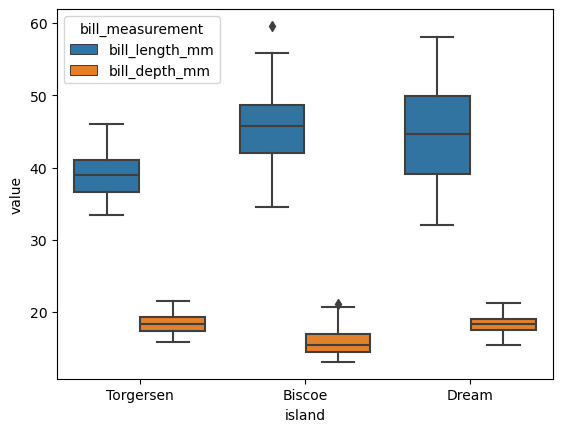

In [29]:
sns.boxplot(hue='bill_measurement', y='value', x='island', data=penguins_long)

Come back to the previous format using pivot function

In [30]:
wide_penguins = pd.pivot(penguins_long,             # <===  tidy/long format df
                     columns='bill_measurement',    # <=== column(s) whose values we want as our new columns
                     index=['id', 'island', 'sex'], # <=== column(s) that will be used as a new index
                     values='value')                # <=== column whose values we want to populate our new wide dataframe

In [52]:
wide_penguins.reset_index()

bill_measurement,id,island,sex,bill_depth_mm,bill_length_mm
0,0,Torgersen,Male,18.7,39.1
1,1,Torgersen,Female,17.4,39.5
2,2,Torgersen,Female,18.0,40.3
3,3,Torgersen,NaN,NaN,NaN
4,4,Torgersen,Female,19.3,36.7
...,...,...,...,...,...
339,339,Biscoe,NaN,NaN,NaN
340,340,Biscoe,Female,14.3,46.8
341,341,Biscoe,Male,15.7,50.4
342,342,Biscoe,Female,14.8,45.2


#### Is the data the same as before? If not, why do you think so?

We dropped some of the columns while performing melting at the beginning and we can't retrieve them

### What are the average bill measurements? More about penguins statistics

There are a few ways how to get some descriptive statistics about the data:
- run `.describe` method
- perform groupby
- pivot table the data

### Pivot Table
- pivots table with aggregation
- default aggregation function is mean
- do not use unless you want to have aggregation
- if you have duplicates in the table pivot will return an error
- if you have duplicates in the table pivot_table will take the mean of the two observations
- please be careful which function you use and ensure the result you want is not aggregation without that being you goal

In [32]:
penguins_wide = penguins_long.pivot_table(values='value', 
                                            columns='bill_measurement',
                                            index=['island', 'sex'],
                                         aggfunc="mean")

In [33]:
penguins_wide

bill_measurement  bill_depth_mm  bill_length_mm
island    sex                                  
Biscoe    Female      15.191250       43.307500
          Male        16.597590       47.119277
Dream     Female      17.601639       42.296721
          Male        19.066129       46.116129
Torgersen Female      17.550000       37.554167
          Male        19.391304       40.586957

In [34]:
penguins_wide.reset_index()

bill_measurement,island,sex,bill_depth_mm,bill_length_mm
0,Biscoe,Female,15.191250,43.307500
1,Biscoe,Male,16.597590,47.119277
2,Dream,Female,17.601639,42.296721
3,Dream,Male,19.066129,46.116129
4,Torgersen,Female,17.550000,37.554167
5,Torgersen,Male,19.391304,40.586957
